# Module 7 Exercises - Linear Regression

### Exercise 1:

Using the pandas library, in the datasets folder load the gradedata.csv file as a dataframe. Narrow your data (make the dataframe smaller) by choosing columns that you think can help predict student grades. Use any method that you've learned so far to help your decision on which columns to keep. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn #library for predictive modeling

%matplotlib inline

In [2]:
location = "datasets/gradedata.csv"
df= pd.read_csv(location)

In [4]:
df.shape

(2000, 8)

In [6]:
df.keys()

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [8]:
df.columns

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [13]:
df1=df.copy()
df1.drop(df1.columns[[0,1,2,3,7]], axis=1, inplace=True)

In [14]:
df1.head()

,exercise,hours,grade
0,3,10,82.4
1,4,4,78.2
2,5,9,79.3
3,2,7,83.2
4,4,15,87.4


### Exercise 2:

Using the dataframe in the exercise above, clean and prepare your data. This means to eliminate any null (missing) values (either by dropping or filling them) and to transform any data column types to numerical values that a model can interpret. For example, if the column has string values, convert them to integers that best represent their order.

In [16]:
df1.dtypes

exercise      int64
hours         int64
grade       float64
dtype: object

In [18]:
df1.count()

exercise    2000
hours       2000
grade       2000
dtype: int64

In [21]:
df1=df1.dropna()
df1.count()

exercise    2000
hours       2000
grade       2000
dtype: int64

### Exercise 3:

Using the cleaned dataframe in the exercise above, use the sklearn library to split the data into training and test datasets. Make the test size 30%.

In [42]:
from sklearn.linear_model import LinearRegression

#make dataframe that only contains predictive features
X = df1.drop(df1.columns[[2]], axis = 1)

#assign linear regression function to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#test_size default = 0.25
#train_test_split function give back 4 variables
#2 variables for X (the predictive features) - training and testing
#2 variables for y (the target) - training and testing

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df1.grade, test_size=0.30, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1400, 2)
(600, 2)
(1400,)
(600,)


### Exercise 4:

Using the training data from the previous exercise, set a linear regression function to fit the data (build the model).

In [45]:
lm.fit(X, df1.grade)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
lm.score(X, df1['grade'])

0.6634518165130183

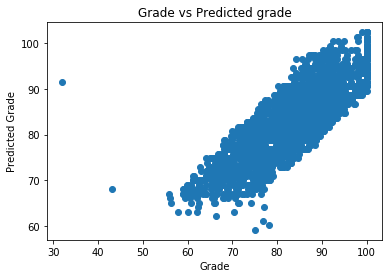

In [51]:
plt.scatter(df1['grade'], lm.predict(X))
plt.xlabel("Grade")
plt.ylabel("Predicted Grade")
plt.title("Grade vs Predicted grade")
plt.show()

### Exercise 5:

What is the intercept coefficient (y-intercept) for the linear regression model?

In [46]:
#y-intercept for the linear regression formula
print('Estimated intercept coefficient:', lm.intercept_)

#number of predictive features
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 58.53161028172565
Number of coefficients: 2


### Exercise 6:

Use the predict function on the training data and the test data.

In [47]:
#calculate the model using the training data
lm.fit(X_train, Y_train)

#predictions for training and test data
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

### Exercise 7:

Calculate the score of the training and test predictions. How "good" was the linear regression model at predicting the test data compared to the training data?

In [48]:
#evaluate the accuracy of the model of training vs test
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

0.6816231269438374
0.6195744323628822
